In [3]:
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
DATASET_DIR = os.listdir(r"C:\Users\Neharani\Documents\ImageAnalytics\captured_images")
DATASET_DIR            

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [6]:
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] 
DIR = r"C:\Users\Neharani\Documents\ImageAnalytics\captured_images"
link = []
for label in labels:
    path = os.path.join(DIR, label) 
    link.append(path)
print(link)


for i in range(len(link)):
    new = os.listdir(link[i])
    i+=1
    print(f"length : {len(new)}");

['C:\\Users\\Neharani\\Documents\\ImageAnalytics\\captured_images\\0', 'C:\\Users\\Neharani\\Documents\\ImageAnalytics\\captured_images\\1', 'C:\\Users\\Neharani\\Documents\\ImageAnalytics\\captured_images\\2', 'C:\\Users\\Neharani\\Documents\\ImageAnalytics\\captured_images\\3', 'C:\\Users\\Neharani\\Documents\\ImageAnalytics\\captured_images\\4', 'C:\\Users\\Neharani\\Documents\\ImageAnalytics\\captured_images\\5', 'C:\\Users\\Neharani\\Documents\\ImageAnalytics\\captured_images\\6', 'C:\\Users\\Neharani\\Documents\\ImageAnalytics\\captured_images\\7', 'C:\\Users\\Neharani\\Documents\\ImageAnalytics\\captured_images\\8', 'C:\\Users\\Neharani\\Documents\\ImageAnalytics\\captured_images\\9']
length : 100
length : 100
length : 100
length : 100
length : 100
length : 100
length : 100
length : 100
length : 100
length : 100


In [7]:
Bad_File = True
for dirname, _, filenames in os.walk(r"C:\Users\Neharani\Documents\ImageAnalytics\captured_images"):
    for filename in filenames:
        if filename.endswith('.png'):
            Bad_File = False
            print(os.path.join(dirname, filename))
        if filename.endswith('.jpg'):
            Bad_File = True
            print('the files are in .jpg')

C:\Users\Neharani\Documents\ImageAnalytics\captured_images\0\0.png
C:\Users\Neharani\Documents\ImageAnalytics\captured_images\0\1.png
C:\Users\Neharani\Documents\ImageAnalytics\captured_images\0\10.png
C:\Users\Neharani\Documents\ImageAnalytics\captured_images\0\11.png
C:\Users\Neharani\Documents\ImageAnalytics\captured_images\0\12.png
C:\Users\Neharani\Documents\ImageAnalytics\captured_images\0\13.png
C:\Users\Neharani\Documents\ImageAnalytics\captured_images\0\14.png
C:\Users\Neharani\Documents\ImageAnalytics\captured_images\0\15.png
C:\Users\Neharani\Documents\ImageAnalytics\captured_images\0\16.png
C:\Users\Neharani\Documents\ImageAnalytics\captured_images\0\17.png
C:\Users\Neharani\Documents\ImageAnalytics\captured_images\0\18.png
C:\Users\Neharani\Documents\ImageAnalytics\captured_images\0\19.png
C:\Users\Neharani\Documents\ImageAnalytics\captured_images\0\2.png
C:\Users\Neharani\Documents\ImageAnalytics\captured_images\0\20.png
C:\Users\Neharani\Documents\ImageAnalytics\captured

In [8]:
IMG_SIZE = 100 # image size
data = []
edges = []
def get_data(data_dir):
    for category in labels:
        path = os.path.join(data_dir, category) #combine path
        class_num = labels.index(category) # index no of labels
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img),0) # color image array
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # resize
                edges_array = cv2.Canny(img_array, IMG_SIZE, IMG_SIZE)
                data.append([resized_array, class_num])
                edges.append([edges_array, class_num])
            except Exception as e: # exception
                print(e)
    return np.array(data, dtype = object)


# Defining path for function

In [9]:
new_data = get_data(r"C:\Users\Neharani\Documents\ImageAnalytics\captured_images")

In [10]:
print(len(new_data))
print(new_data.shape)

1000
(1000, 2)


# Analysis 

#### VISUALIZATION

In [11]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})
l = []
for i in new_data:
 l.append(labels[i[1]])
sns.set_style('dark')
countplot = sns.countplot(x=l)
for p in countplot.patches:
 countplot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.45, p.get_height()+0.1))


ModuleNotFoundError: No module named 'seaborn'

In [14]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})
l = []
for i in new_data:
    l.append(labels[i[1]])
sns.set_style('dark')
countplot = sns.countplot(x=l, color="salmon", facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("Set2"))
for p in countplot.patches:
    countplot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.45, p.get_height()+0.1))


ModuleNotFoundError: No module named 'seaborn'

# #Shuffling the training data

In [69]:
import matplotlib.pyplot as plt
import random
random.shuffle(new_data)

# Visualization of random images

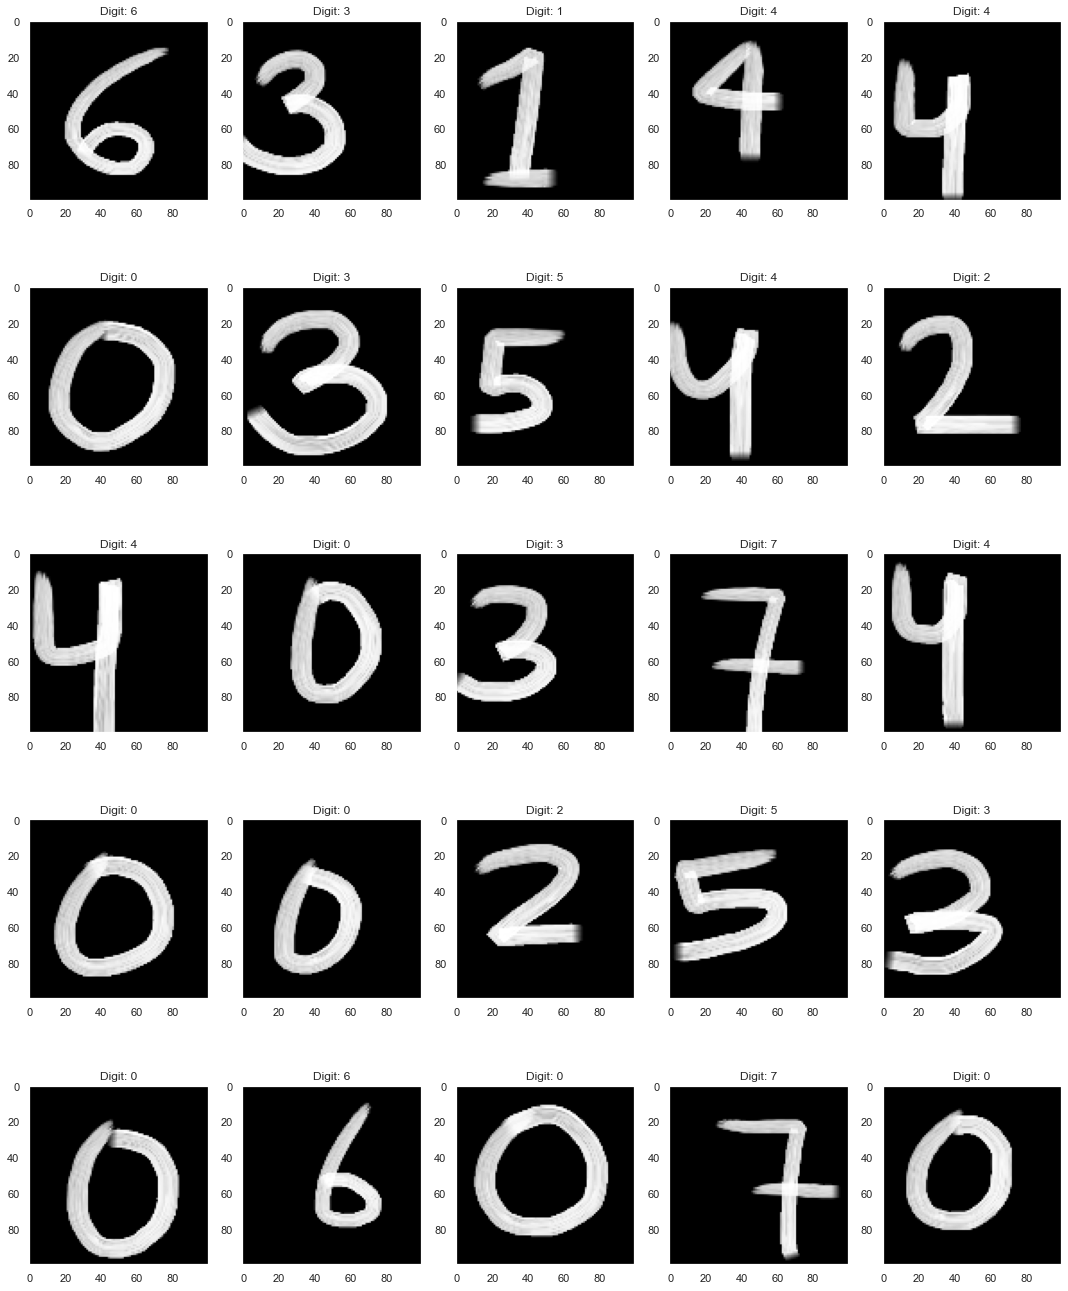

In [70]:
# random image visualization
fig=plt.figure(figsize=(15, 20))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    r = random.randint(0, len(new_data))
    img = (new_data[r][0])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img,cmap = "gray")
    plt.title(f"Digit: {labels[new_data[r][1]]}")
    fig.tight_layout()
plt.show()


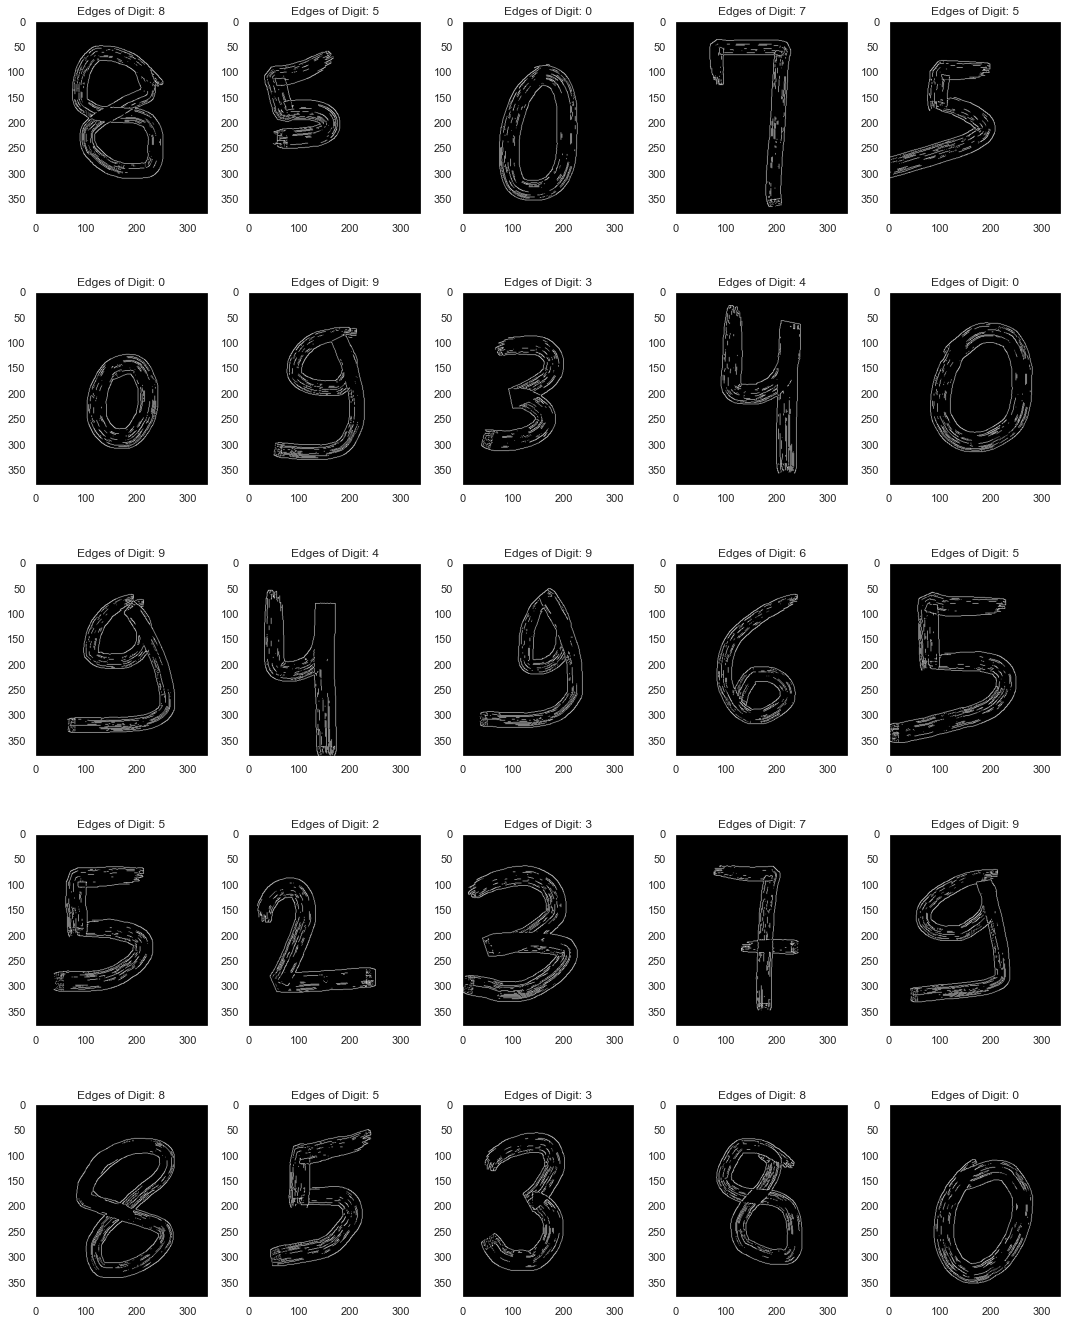

In [75]:
# image edge visualization
fig=plt.figure(figsize=(15, 20))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    r = random.randint(0, len(new_data))
    img = (edges[r][0])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img,cmap = "gray")
    plt.title(f"Edges of Digit: {labels[edges[r][1]]}")
    fig.tight_layout()
plt.show()


### Splitting dataset into Training and Testing

In [32]:
# separate item and label
x = []
y = []
for feature, label in new_data:
    x.append(feature)
    y.append(label)
x[0],y[0]

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 0)

### Normalizing the data

In [33]:
x = np.array(x) / 255

In [34]:
x

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

### Reshaping data

In [42]:
x = x.reshape(-1, IMG_SIZE, IMG_SIZE)# Reshape array with channel 3  
y = np.array(y)

In [43]:
y.shape

(1000, 10)

In [44]:
x.shape

(1000, 100, 100)

### Using labelbinarizer to convert label into binary

In [45]:
from sklearn.preprocessing import LabelBinarizer # LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y) 

In [46]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [47]:
print("y",y.shape)

y (1000, 10)


In [48]:
# split data
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.2)

In [50]:
print("train_X",len(x_train))
print("test_X",len(x_test))
print("train_y",len(y_train))
print("test_y",len(y_test))

train_X 800
test_X 200
train_y 800
test_y 200


### Model Building